# Analisi MOV vs STATIC ex post 'previsione' vs. 'reale'

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [9]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/artabax/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/artabax/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/'

In [10]:
df = pd.read_csv(path+'Gdrive_csv/20221228_1251PM_biceps_PROB.csv')
#df_raw.set_index('Time', inplace=True)
df

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,status,mov,prob
0,1672228262084,-8.722662,-3.575764,2.071692,0.280000,0.210000,0.070000,21.744318,-76.639410,0.005615,9.652089,0,NaN,0.041
1,1672228262194,-8.737032,-3.551814,1.908831,2.239999,1.190000,-0.560000,21.660804,-77.675903,0.025635,9.622616,0,NaN,0.041
2,1672228262305,-8.741821,-3.520679,2.028582,2.939999,0.140000,0.630000,21.420835,-76.935469,0.018555,9.640008,0,NaN,0.040
3,1672228262422,-8.804092,-3.616480,2.069297,2.869999,1.679999,1.120000,21.795279,-76.773381,0.017578,9.740275,0,NaN,0.040
4,1672228262536,-8.835227,-3.604505,1.971101,0.700000,-1.330000,0.770000,21.711503,-77.423510,0.031738,9.743661,0,NaN,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1672228296399,-8.116721,-5.266648,-0.323328,10.569996,5.319998,2.449999,32.957351,-92.281158,0.032471,9.681079,0,NaN,0.069
303,1672228296513,-8.315508,-5.288203,-0.198787,12.389996,6.159998,1.260000,32.446694,-91.369425,0.005127,9.856586,0,NaN,0.066
304,1672228296627,-8.006551,-5.304968,-0.174836,23.799990,10.639997,6.229998,33.521311,-91.250950,0.010498,9.606150,0,NaN,0.066
305,1672228296739,-8.056846,-5.278623,-0.399968,32.759987,19.319992,10.709996,33.199395,-92.842018,0.012695,9.640363,0,NaN,0.066


In [11]:
soglia_prob = 0.5
rolling_prob = 10

In [12]:
df.rolling(5).mean()
df['prob'] = df['prob'].rolling(rolling_prob).mean()

In [13]:
df['prob'].loc[df['prob'] > soglia_prob] = 1
df['prob'].loc[df['prob'] <= soglia_prob] = 0

/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_50356/508540148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] > soglia_prob] = 1
/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_50356/508540148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] <= soglia_prob] = 0


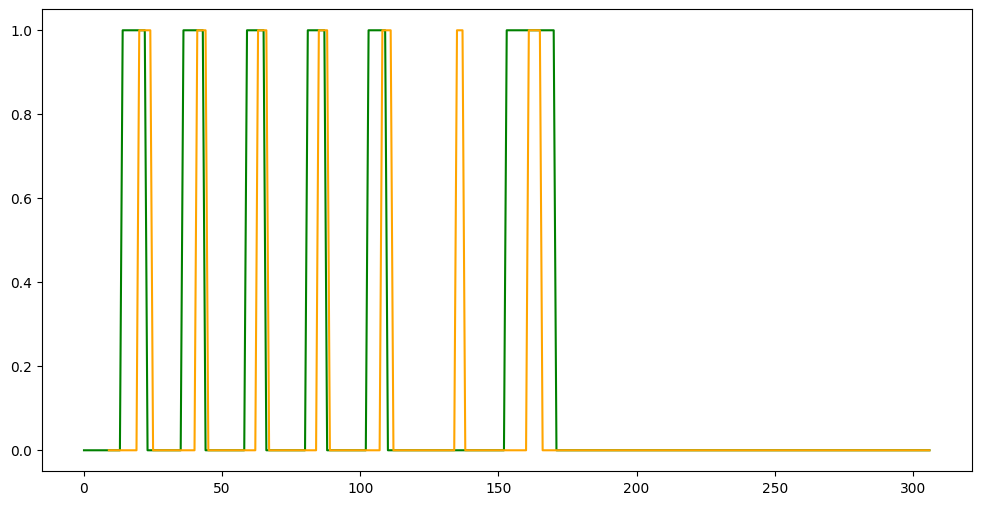

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['status'], color='green')
plt.plot(df['prob'], color='orange')
plt.show()